# Visualizing CNN Model
***Created by: Engg. Muhammad Saleem Raza***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras import layers

### Loading a saved model and printing a summary

In [2]:
model = load_model('cat_dog_trained_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

### Preprocessing a single image

In [3]:
img_path = 'images/cat.jpg'

img = image.load_img(img_path, target_size=(150, 150)) # We preprocess the image into a 4D tensor
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape) # Its shape is (1, 150, 150, 3)

(1, 150, 150, 3)


### Displaying the test picture

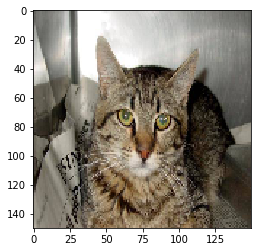

In [4]:
plt.imshow(img_tensor[0])

### Instantiating a Model from an input tensor and a list of output tensors

In [5]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(model.input, layer_outputs)
activation_model

### Running our model in predict mode

In [6]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

### First entry in the outputs: the output of the first layer of the original model

In [7]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


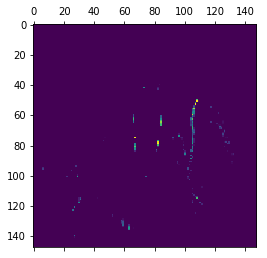

In [8]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

### Plotting the 7th channel of the activation of the first layer of the original model

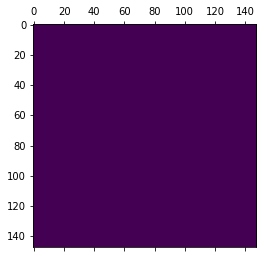

In [9]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

### Visualizing every channel in every intermediate activation

C:\Users\Muhammad Saleem Raza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


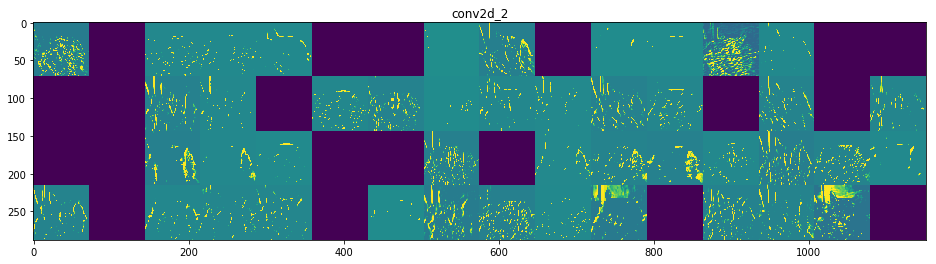

In [10]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []

for layer in model.layers[:8]:
    if isinstance(layer, layers.Conv2D):
        layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    
    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]
    
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image


# Display the grid
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')